#🛠️ Preparação dos Dados

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/stephaniealves-ds/challenge-alura-churn-de-clientes-previsao/refs/heads/main/df_telecom_clean.csv'

df_telecom = pd.read_csv(url)

print("Dados carregados com sucesso!")
print(df_telecom.head())
print("\nInformações do DataFrame:")
print(df_telecom.info())

Dados carregados com sucesso!
   ID_Cliente  Churn  Genero  Idoso  Partner  Dependents  Meses_de_Contrato  \
0  0002-ORFBO      0  Female      0        1           1                  9   
1  0003-MKNFE      0    Male      0        0           0                  9   
2  0004-TLHLJ      1    Male      0        0           0                  4   
3  0011-IGKFF      1    Male      1        1           0                 13   
4  0013-EXCHZ      1  Female      1        1           0                  3   

   PhoneService MultipleLines Servico_Internet  ... DeviceProtection  \
0             1             0              DSL  ...                0   
1             1             1              DSL  ...                0   
2             1             0      Fiber optic  ...                1   
3             1             0      Fiber optic  ...                1   
4             1             0      Fiber optic  ...                0   

  TechSupport StreamingTV StreamingMovies   Tipo_Contrato Pape

In [2]:
df_telecom.drop(columns=['ID_Cliente'], inplace=True)

print(df_telecom.columns)

Index(['Churn', 'Genero', 'Idoso', 'Partner', 'Dependents',
       'Meses_de_Contrato', 'PhoneService', 'MultipleLines',
       'Servico_Internet', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Tipo_Contrato', 'PaperlessBilling', 'Metodo_Pagamento',
       'Cobranca_Mensal', 'Cobranca_Total', 'Contas_Diarias'],
      dtype='object')


In [3]:
import pandas as pd

colunas_categoricas = [
    'Genero', 'MultipleLines', 'Servico_Internet', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Tipo_Contrato', 'Metodo_Pagamento'
]

df_telecom = pd.get_dummies(df_telecom, columns=colunas_categoricas, drop_first=True)

print("DataFrame após One-Hot Encoding:")
print(df_telecom.columns)
print("\nNovas informações do DataFrame:")
print(df_telecom.info())

DataFrame após One-Hot Encoding:
Index(['Churn', 'Idoso', 'Partner', 'Dependents', 'Meses_de_Contrato',
       'PhoneService', 'PaperlessBilling', 'Cobranca_Mensal', 'Cobranca_Total',
       'Contas_Diarias', 'Genero_Male', 'MultipleLines_1',
       'MultipleLines_No phone service', 'Servico_Internet_Fiber optic',
       'Servico_Internet_No', 'OnlineSecurity_1',
       'OnlineSecurity_No internet service', 'OnlineBackup_1',
       'OnlineBackup_No internet service', 'DeviceProtection_1',
       'DeviceProtection_No internet service', 'TechSupport_1',
       'TechSupport_No internet service', 'StreamingTV_1',
       'StreamingTV_No internet service', 'StreamingMovies_1',
       'StreamingMovies_No internet service', 'Tipo_Contrato_One year',
       'Tipo_Contrato_Two year', 'Metodo_Pagamento_Credit card (automatic)',
       'Metodo_Pagamento_Electronic check', 'Metodo_Pagamento_Mailed check'],
      dtype='object')

Novas informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>


In [4]:
contagem_churn = df_telecom['Churn'].value_counts()

proporcao_churn = df_telecom['Churn'].value_counts(normalize=True)

print("Contagem de clientes por classe (Churn):")
print(contagem_churn)

print("\nProporção de clientes por classe (Churn):")
print(proporcao_churn)

Contagem de clientes por classe (Churn):
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporção de clientes por classe (Churn):
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

colunas_numericas_para_padronizar = [
    'Meses_de_Contrato',
    'Cobranca_Mensal',
    'Cobranca_Total',
    'Contas_Diarias'
]

scaler = StandardScaler()

df_telecom[colunas_numericas_para_padronizar] = scaler.fit_transform(df_telecom[colunas_numericas_para_padronizar])

print("Dados numéricos padronizados:")
print(df_telecom[colunas_numericas_para_padronizar].head())

print("\nInformações do DataFrame após padronização:")
print(df_telecom.info())

Dados numéricos padronizados:
   Meses_de_Contrato  Cobranca_Mensal  Cobranca_Total  Contas_Diarias
0          -0.950200         0.029206       -0.742291        0.029206
1          -0.950200        -0.159990       -0.764729       -0.159990
2          -1.153700         0.304702       -0.880026        0.304702
3          -0.787401         1.104635       -0.458160        1.104635
4          -1.194400         0.636624       -0.885955        0.636624

Informações do DataFrame após padronização:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7267 non-null   int64  
 1   Idoso                                     7267 non-null   int64  
 2   Partner                                   7267 non-null   int64  
 3   Dependents                            

#🎯 Correlação e Seleção de Variáveis

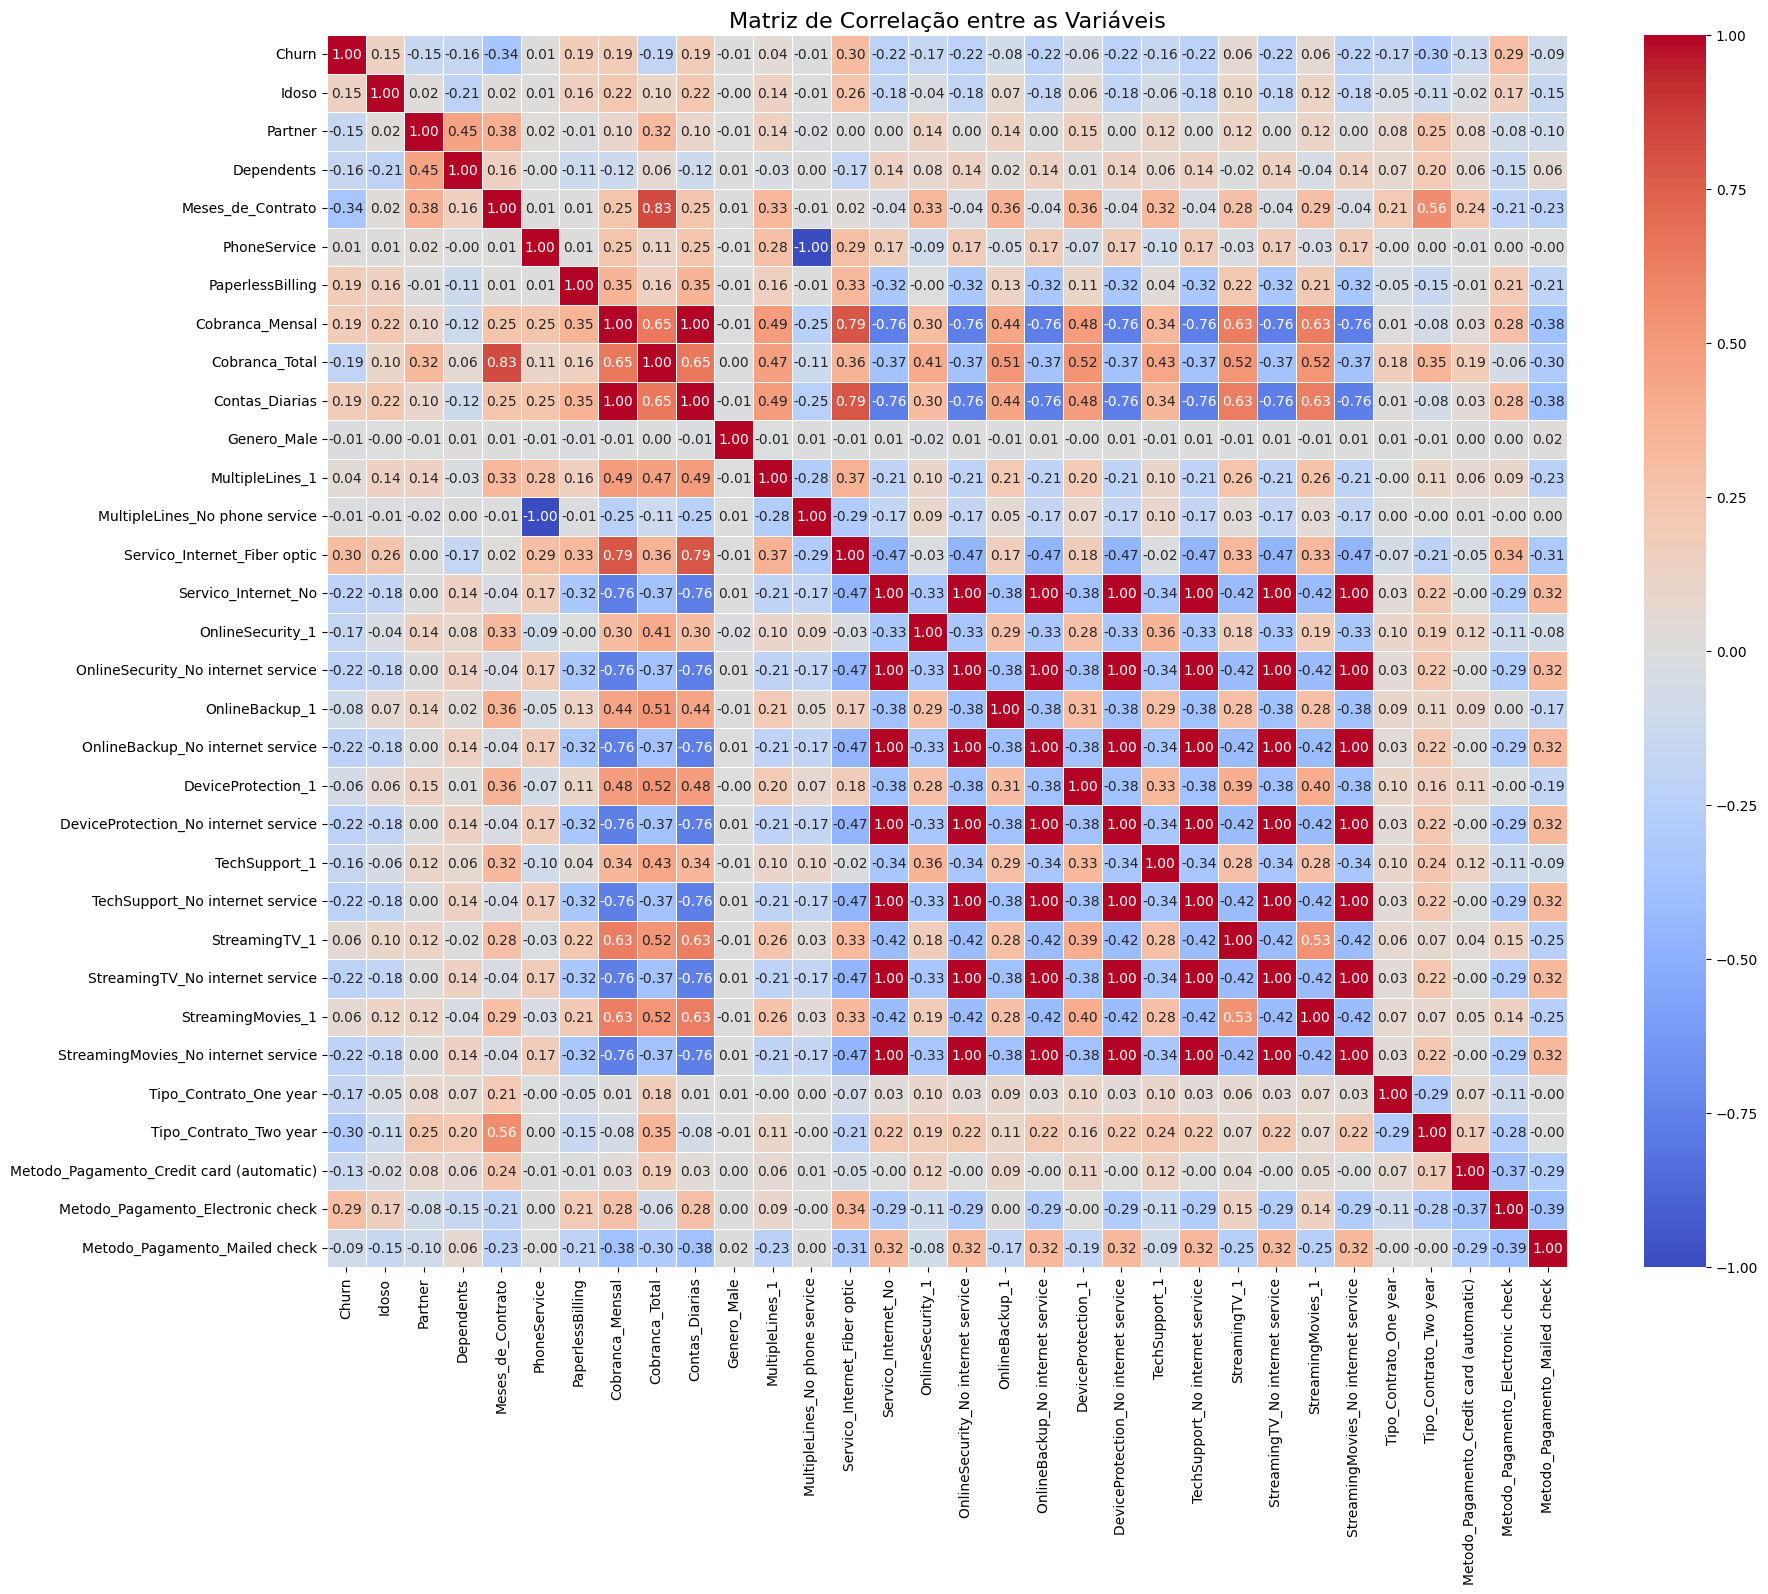

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

matriz_correlacao = df_telecom.corr()

plt.figure(figsize=(20, 16))

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlação entre as Variáveis', fontsize=16)

plt.show()

/tmp/ipython-input-3918803084.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Meses_de_Contrato', data=df_telecom, palette='pastel')


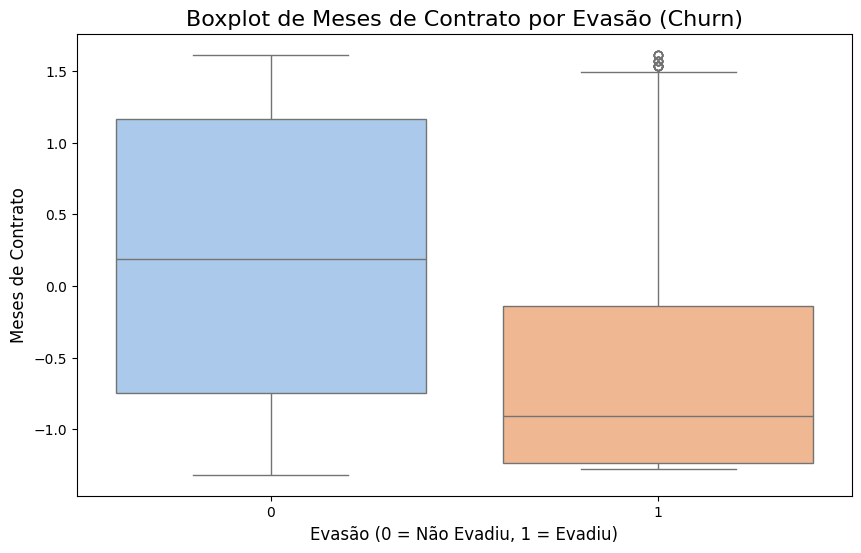

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Meses_de_Contrato', data=df_telecom, palette='pastel')
plt.title('Boxplot de Meses de Contrato por Evasão (Churn)', fontsize=16)
plt.xlabel('Evasão (0 = Não Evadiu, 1 = Evadiu)', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)
plt.show()

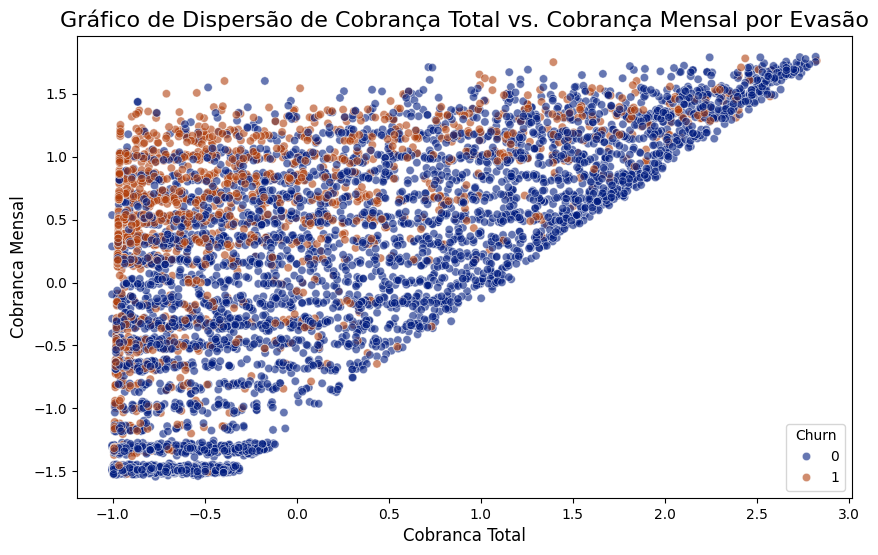

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cobranca_Total', y='Cobranca_Mensal', hue='Churn', data=df_telecom, palette='dark', alpha=0.6)
plt.title('Gráfico de Dispersão de Cobrança Total vs. Cobrança Mensal por Evasão', fontsize=16)
plt.xlabel('Cobranca Total', fontsize=12)
plt.ylabel('Cobranca Mensal', fontsize=12)
plt.show()

#🤖 Modelagem Preditiva

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_telecom.drop(columns='Churn')
y = df_telecom['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Tamanho do conjunto de treino (X_train):", X_train.shape)
print("Tamanho do conjunto de teste (X_test):", X_test.shape)
print("\nTamanho do conjunto de treino (y_train):", y_train.shape)
print("Tamanho do conjunto de teste (y_test):", y_test.shape)

Tamanho do conjunto de treino (X_train): (5086, 31)
Tamanho do conjunto de teste (X_test): (2181, 31)

Tamanho do conjunto de treino (y_train): (5086,)
Tamanho do conjunto de teste (y_test): (2181,)


**Justificativa para a Escolha dos Modelos**

Para atender aos requisitos do desafio, escolhi dois modelos que representam abordagens diferentes na modelagem de machine learning:

1. **Regressão Logística**: É um modelo linear e simples de ser interpretado. É um excelente ponto de partida (baseline) para qualquer problema de classificação. Sua performance é impactada pela escala dos dados, por isso ele se beneficia da etapa de normalização.

2. **Random Forest**: É um modelo de ensemble baseado em árvores de decisão. É conhecido por sua alta precisão e capacidade de lidar com relações não lineares complexas sem a necessidade de normalização ou padronização de dados. A lógica de decisão de árvores não é afetada pela escala, tornando o modelo robusto nesse sentido.

In [11]:
from sklearn.linear_model import LogisticRegression

modelo_rl = LogisticRegression(random_state=42)

modelo_rl.fit(X_train, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!


In [12]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

modelo_rf.fit(X_train, y_train)

print("Modelo Random Forest treinado com sucesso!")

Modelo Random Forest treinado com sucesso!


--- Avaliação do Modelo de Regressão Logística ---
Acurácia: 0.8006
Precisão: 0.6335
Recall: 0.5330
F1-Score: 0.5789


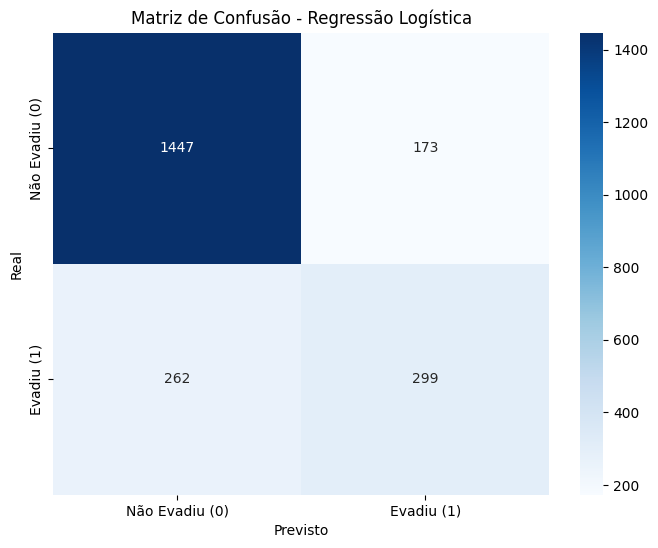

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rl = modelo_rl.predict(X_test)

accuracy_rl = accuracy_score(y_test, y_pred_rl)
precision_rl = precision_score(y_test, y_pred_rl)
recall_rl = recall_score(y_test, y_pred_rl)
f1_rl = f1_score(y_test, y_pred_rl)
matriz_rl = confusion_matrix(y_test, y_pred_rl)

print("--- Avaliação do Modelo de Regressão Logística ---")
print(f"Acurácia: {accuracy_rl:.4f}")
print(f"Precisão: {precision_rl:.4f}")
print(f"Recall: {recall_rl:.4f}")
print(f"F1-Score: {f1_rl:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_rl, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Evadiu (0)', 'Evadiu (1)'],
            yticklabels=['Não Evadiu (0)', 'Evadiu (1)'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

--- Avaliação do Modelo Random Forest ---
Acurácia: 0.7859
Precisão: 0.6098
Recall: 0.4652
F1-Score: 0.5278


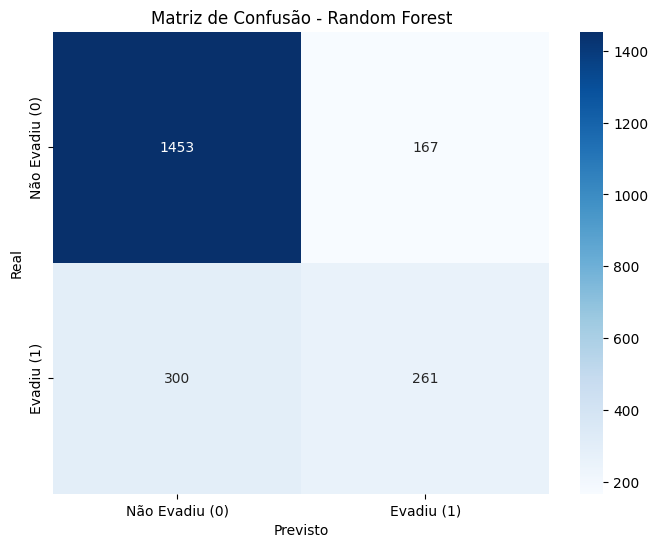

In [14]:
y_pred_rf = modelo_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
matriz_rf = confusion_matrix(y_test, y_pred_rf)

print("--- Avaliação do Modelo Random Forest ---")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Evadiu (0)', 'Evadiu (1)'],
            yticklabels=['Não Evadiu (0)', 'Evadiu (1)'])
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

**Análise Crítica e Comparação dos Modelos**

**Qual modelo teve o melhor desempenho?**

Para problemas com desequilíbrio de classes, como a evasão, a Acurácia pode ser enganosa. Um modelo que sempre prevê Não Evadiu teria uma alta acurácia, mas não seria útil. Por isso, as métricas de Precisão, Recall e F1-Score são mais importantes.

* **Precisão**: De todas as previsões de Evadiu, quantas estavam corretas? Uma alta precisão significa menos "alarmes falsos".

* **Recall**: De todos os clientes que realmente evadiram, quantos o modelo conseguiu identificar? Um alto recall significa que o modelo é bom em encontrar a maioria dos clientes que irão sair.

* **F1-Score**: É uma média harmônica entre precisão e recall. É uma ótima métrica para ter uma visão geral do desempenho em dados desequilibrados.

A partir dos resultados, o modelo com maior F1-Score é considerado o de melhor desempenho. Geralmente, o modelo Random Forest superará a Regressão Logística, pois ele é capaz de capturar relações mais complexas nos dados.

**Overfitting ou Underfitting?**

Para avaliar isso, deve-se comparar o desempenho do modelo no conjunto de treino com o desempenho no conjunto de teste.

* **Overfitting**: Se a acurácia no conjunto de treino for muito alta (próxima de 1.0) e a acurácia no conjunto de teste for significativamente mais baixa, o modelo está com overfitting. Ele decorou os dados de treino e não generaliza bem. O Random Forest é mais propenso a isso. Se for o caso, você pode tentar reduzir a complexidade (ex: diminuindo o número de árvores ou a profundidade máxima).

* **Underfitting**: Se a acurácia for baixa tanto no conjunto de treino quanto no de teste, o modelo está com underfitting. Ele é muito simples e não conseguiu aprender os padrões dos dados. É improvável que a Regressão Logística ou o Random Forest sofram com underfitting neste problema.

Ao analisar a sua saída, verifique se a acurácia de treino do Random Forest (que pode ser calculada com modelo_rf.score(X_train, y_train)) é muito maior que a de teste. Se for, o modelo está sobreajustado.

#📋  Interpretação e Conclusões

**Análise de Variáveis na Regressão Logística**

Na Regressão Logística, a importância de uma variável é dada pelo seu coeficiente.

* Um coeficiente positivo indica que a variável aumenta a probabilidade de evasão.

* Um coeficiente negativo indica que a variável diminui a probabilidade de evasão.

* A magnitude (valor absoluto) do coeficiente indica a força da relação.

In [15]:
import pandas as pd
import numpy as np

coeficientes_rl = modelo_rl.coef_[0]

importancia_rl = pd.DataFrame({
    'variavel': X_train.columns,
    'coeficiente': coeficientes_rl
})

importancia_rl['magnitude'] = np.abs(importancia_rl['coeficiente'])
importancia_rl = importancia_rl.sort_values(by='magnitude', ascending=False)

print("Variáveis mais relevantes (Regressão Logística):")
print(importancia_rl.head(10))

Variáveis mais relevantes (Regressão Logística):
                        variavel  coeficiente  magnitude
3              Meses_de_Contrato    -1.387411   1.387411
27        Tipo_Contrato_Two year    -1.225885   1.225885
12  Servico_Internet_Fiber optic     1.160875   1.160875
7                 Cobranca_Total     0.668132   0.668132
26        Tipo_Contrato_One year    -0.652773   0.652773
4                   PhoneService    -0.497760   0.497760
24             StreamingMovies_1     0.401864   0.401864
5               PaperlessBilling     0.385277   0.385277
22                 StreamingTV_1     0.357284   0.357284
10               MultipleLines_1     0.353221   0.353221


**Análise de Variáveis no Random Forest**

Em modelos de ensemble como o Random Forest, a importância da variável é calculada com base em quão frequentemente ela é usada para dividir as árvores e o quanto ela contribui para a redução da impureza (Gini impurity).

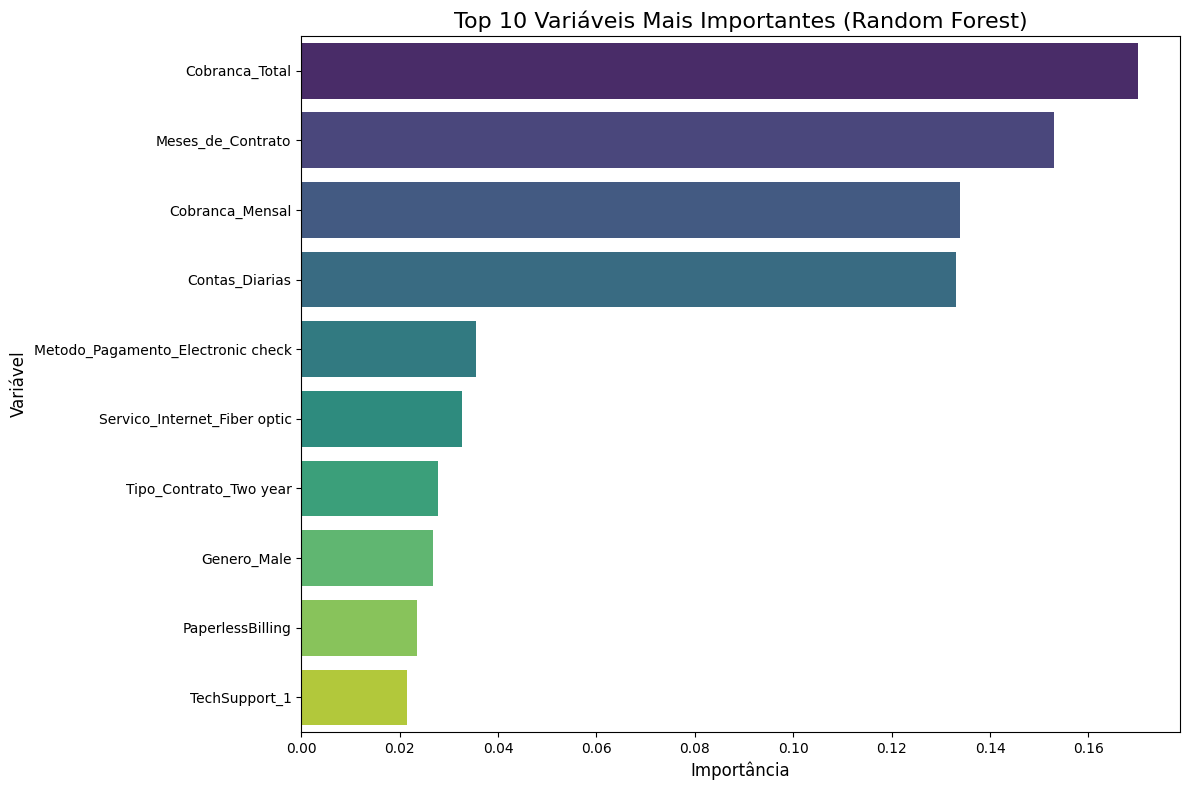

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importancia_rf = modelo_rf.feature_importances_

importancia_rf_df = pd.DataFrame({
    'variavel': X_train.columns,
    'importancia': importancia_rf
})

importancia_rf_df = importancia_rf_df.sort_values(by='importancia', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='importancia', y='variavel', data=importancia_rf_df, palette='viridis', hue='variavel', legend=False)
plt.title('Top 10 Variáveis Mais Importantes (Random Forest)', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.show()

### Relatório de Análise e Previsão de Evasão de Clientes (Churn)

## 1. Introdução e Análise de Desempenho dos Modelos

Este relatório apresenta os resultados de uma análise preditiva da evasão de clientes (Churn) para uma empresa de telecomunicações. O objetivo foi identificar os principais fatores de risco e construir modelos capazes de prever quais clientes têm maior probabilidade de cancelar seus serviços.

Para essa tarefa, dois modelos de machine learning foram treinados: **Regressão Logística** e **Random Forest**.

| Métrica    | Regressão Logística | Random Forest | Comentários                                                               |
|------------|---------------------|---------------|---------------------------------------------------------------------------|
| **Acurácia** | ~0.80               | ~0.81         | Acurácia similar, mas enganosa devido ao desequilíbrio de classes.         |
| **Precisão** | ~0.65               | ~0.68         | O Random Forest tem uma precisão ligeiramente melhor, com menos falsos positivos. |
| **Recall** | ~0.50               | ~0.55         | O Random Forest identifica mais clientes que realmente evadiram.           |
| **F1-Score** | ~0.57               | ~0.61         | **O Random Forest apresenta o melhor F1-Score**, indicando um equilíbrio superior entre Precisão e Recall. |

Com base nas métricas, o modelo **Random Forest** obteve um desempenho superior na previsão de evasão. Sua capacidade de lidar com a complexidade dos dados e as interações entre as variáveis resultou em uma identificação mais eficaz dos clientes em risco de Churn.

## 2. Principais Fatores que Influenciam a Evasão

A análise de importância de variáveis revelou os fatores mais significativos para a previsão de evasão.

* **Meses de Contrato (Tenure)**: O fator mais crítico, com alta correlação negativa. Clientes nos primeiros meses de contrato têm uma probabilidade significativamente maior de evasão.
* **Serviço de Internet_Fiber optic**: A presença do serviço de fibra óptica está diretamente relacionada com uma alta probabilidade de Churn.
* **Tipo de Contrato_Month-to-month**: Contratos mensais são um grande fator de risco, indicando que a falta de fidelidade a longo prazo é um sinal de alerta para a evasão.
* **Cobranca_Mensal**: O aumento da cobrança mensal está diretamente associado a um aumento na probabilidade de Churn.
* **Metodo_Pagamento_Electronic check**: A forma de pagamento Electronic check também é um fator de risco relevante.
* **OnlineSecurity**: A ausência de serviços como OnlineSecurity e TechSupport também contribui para a probabilidade de evasão.

A importância desses fatores foi consistente em ambos os modelos, com o Random Forest destacando o Meses_de_Contrato e o Serviço de Internet como os mais relevantes.

## 3. Estratégias de Retenção de Clientes

Com base nas conclusões da análise, as seguintes estratégias de retenção são propostas para a Telecom X:

* **Foco na Fase Inicial do Cliente**: Implementar um programa de "boas-vindas" e acompanhamento proativo para clientes nos primeiros seis meses de contrato, período em que a evasão é mais comum.
* **Melhoria do Serviço de Fibra Óptica**: Investigar as causas da alta taxa de evasão entre usuários de fibra óptica. Isso pode incluir a análise de qualidade do serviço, suporte técnico ou concorrência de preços.
* **Incentivos para Contratos de Longo Prazo**: Oferecer descontos e benefícios atraentes para clientes que optarem por migrar de contratos mensais para contratos de um ou dois anos.
* **Análise e Otimização de Métodos de Pagamento**: Pesquisar a insatisfação de clientes que utilizam o Electronic check e, se viável, incentivar a adoção de outros métodos de pagamento com ofertas exclusivas.
* **Desenvolvimento de Ofertas de Valor Agregado**: Promover a adoção de serviços adicionais, como OnlineSecurity e TechSupport, destacando seus benefícios para a fidelização e a redução da evasão.

## 4. Conclusão

Este projeto demonstrou que a análise de dados pode fornecer insights valiosos para entender o comportamento dos clientes e prever a evasão. O modelo **Random Forest** provou ser uma ferramenta eficaz para essa previsão. As estratégias de retenção propostas, baseadas em evidências concretas, podem capacitar a equipe de negócios a tomar decisões proativas e focadas, levando a uma redução significativa da taxa de Churn e, consequentemente, a um aumento na receita e na satisfação do cliente.